# 04. 선형 회귀 알고리즘
> 가장 기초적인 회귀 알고리즘인 선형회귀에 대해 배워봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 3]
- permalink: /linear_regression
- exec: colab

가장 기초적인 머신러닝 알고리즘인 선형회귀에 대해 배워보고, 실습을 진행해보겠습니다.
<br><br>

### 1. 선형 회귀(linear regression) 알고리즘 이란?

![](https://mlfromscratch.com/content/images/2020/01/linearRegression2-3.png)

이번에 알려드릴 선형 회귀(linear regression) 알고리즘은 머신 러닝에 기초가 되는 **회귀 알고리즘**입니다. 선형 회귀 알고리즘은 데이터 샘플에 맞는 **최적의 직선**을 구하고 이를 통해 예측값을 산출하는 회귀 알고리즘입니다. 회귀알고리즘이기 때문에 정답열의 데이터가 연속형일때 사용합니다.
<br><br>

그러나 모든 경우에 사용할 수는 없고, 선형 회귀는 **"우리가 예측하고자 하는 데이터는 선형적인 특성을 갖고 있다. 즉, $y = wx + b$에 적합하다."** 라는 가정이 있을 때만 사용할 수 있습니다. (그렇지 않은 경우 좋은 성능을 얻기 어렵습니다.)
<br><br>

### 2. 오차 함수 (Loss Function) 정의하기

오차를 구하는 방법을 함께 생각해보면서 오차함수라는 것을 우리가 직접 만들어봅시다. 먼저 직선 $y = wx + b$의 $w$와 $b$는 랜덤하게 초기화 되어있습니다. 그렇다면 아래처럼 형편없는 직선이 만들어질 것입니다. 아래 직선은 데이터를 잘 설명한다고 보기 어렵습니다. (너무 낮게 위치하고 있음)

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/01.jpg?raw=true)

이 상태에서 오차를 측정해봅시다. 오차라는 건 무엇일까요? 매우 간단하게 생각해서 오차는 아래처럼 우리의 예측 직선 $\hat{y} = wx + b$ 과 실제 데이터 $y$ 사이의 차이라고 생각할 수 있습니다. (앞으로 정답은 $y$, 예측은 $\hat{y}$라고 하겠습니다) 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/02.jpg?raw=true)

우리는 데이터셋에 $x$좌표를 가지고 있습니다. 이 $x$좌표를 우리가 현재 추정하고 있는 직선인 $\hat{y} = wx + b$에 대입하면 녹색 직선의 $\hat{y}$좌표가 나옵니다. 그리고 데이터셋에 있는 실제 $y$좌표(파란 점)와 비교하여 차이를 계산할 수 있습니다. <br><br>

그런데 생각해보면, 오차의 값은 1개가 아닙니다. 만약 데이터 샘플이 100개가 있으면 100개의 빨간 선($\hat{y} - y$)이 있을 것입니다. 때문에 전체적인 오차를 평가하기 위해 이 오차의 평균을 구합니다. 데이터 샘플의 수가 $N$개 있다면 평균 오차는 $\frac{1}{N}\sum_{i = 1}^N (\hat{y_i}-y_i)$가 됩니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/03.jpg?raw=true)

음.. 꽤나 괜찮아보입니다. 그런데 아직 몇가지 문제가 있습니다. 몇몇 오차 점들은 직선보다 아래에 있어서 음수 오차를 만들어냅니다. 직선보다 아래에 있는 점들도 오차이기 때문에 오차로서 더해져야하는데, 이러면 오히려 평균 오차를 줄여주게 되기 때문에 학습에 방해가 됩니다.
<br><br>

이 문제를 해결하기 위해 오차 $\hat{y} - y$를 제곱해서 $(\hat{y} - y)^2$로 만듭니다. 그러면 모든 음수가 사라지기 때문이죠. 그러면 이제부터는 평균 오차는 $\frac{1}{N}\sum_{i = 1}^N (\hat{y_i}-y_i)^2$가 됩니다.
<br><br>

$$Variance = \frac{1}{N} \sum_{i = 1}^N (x_i - mean)^2$$
$$LossFunction = \frac{1}{N}\sum_{i = 1}^N (\hat{y_i}-y_i)^2$$
<br>

음... 그런데 이거 어디서 많이 본 것 같은 식 아닌가요? 맞습니다. 통계시간에 배운 분산과 동일합니다. 분산은 샘플과 평균의 차이의 제곱입니다. 오차함수는 샘플과 직선과의 차이의 제곱입니다. 즉, 오차함수라는건, 직선을 평균으로 봤을 때, 직선과 데이터들 사이의 분산을 의미합니다. 
이러한 오차함수를 이제부터 MSE (Mean Squared Error)라고 부르도록 하겠습니다.
<br><br>

- 오차함수의 진짜 학습 원리 (읽어볼 사람만 읽어보세요)

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/04.jpg?raw=true)

표준편차는 오차(분산)의 제곱근이기 때문에, 오차가 작아지면 표준편차도 작아집니다. 표준편차가 작아지면 정규분포 형태를 띄는 모델의 확률분포가 뾰족해지면서 함수값이 높아집니다. 확률분포의 함수값은 통계시간에 배운 Likelihood를 의미합니다. 때문에 함수값이 올라간다는건 곧 모델이 예측하는 확률분포 함수의 Likelihood가 높아진다는 것이 되고 그러면 Likelihood와 비례하는 사후확률 (정확도)는 자연스레 올라가게 됩니다.
<br><br>


### 3. 학습 알고리즘 : 경사 하강 알고리즘 (Gradient Descent)

이제 오차함수를 정의했습니다. 오차함수는 직선과 데이터 사이의 분산이였습니다. 그러면 이 분산을 어떻게 줄일 수 있을까요? 

<br>
$$LossFunction = \frac{1}{N}\sum_{i = 1}^N (\hat{y_i}-y_i)^2$$
<br>

오차는 위와 같이 계산됩니다. 우리가 찾고자 하는 것은 $w$와 $b$이므로, $LossFunction$을 $LossFunction(w, b)$처럼 함수로 표현하겠습니다. 또한, $\hat{y} = wx + b$이기 때문에 이들을 그대로 대입해서 아래처럼 다시 쓸 수 있습니다.

<br>
$$LossFunction(w, b) = \frac{1}{N}\sum_{i = 1}^N ((wx+b)-y_i)^2$$
<br>

미지수가 $w$와 $b$이기 때문에 그외의 것들은 모두 상수입니다. 그러면 오차함수라는 것은 $w$와 $b$의 2차함수로 설명됩니다. 식만 봐서는 와닿지 않으니 아래의 그림을 볼까요? 우리가 직접 만들어낸 오차함수는 2차함수이기 때문에 공간상에서 아래와 같은 모습을 하고 있습니다. <br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/05.jpg?raw=true)
<br><br>

현재 랜덤으로 w와 b를 초기화 했기 때문에 현재 w와 b의 위치에서 Loss함수의 함수값이 굉장히 높습니다. 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/06.jpg?raw=true)
<br><br>

그러나 만약 w와 b가 움직여서 저 지점에 있다면 Loss가 최소값이 되겠죠?

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/07.jpg?raw=true)
<br><br>

실제로 경사하강법 알고리즘은 경사를 타고 쭉 내려가서 w와 b를 조정하고 Loss가 최소인곳을 찾아냅니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/08.gif?raw=true)

그런데 3차원에서 생각하는건 너무 복잡하고 머리 아프니 2차원이라고 생각하고 수식으로 풀어봅시다.

<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/10.png?raw=true)

b는 생략하고 w만 봅시다. 위 그림에서 최종적으로 도착해야 하는 가장 Loss가 낮은 지점은 w=-2라고 해봅시다. 현재 w는 20에 있습니다. 이 위치에서는 기울기가 양수입니다. 따라서 $w := w - \frac{dLoss}{dW}$와 같이, w값에서 w방향의 기울기(편미분)를 뺍니다. 그러면 w는 줄어들고 조금 더 최소값에 가까워집니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/11.png?raw=true)

위 그림에서 현재 w는 8에 있습니다. 이 위치에서는 기울기가 양수입니다. 따라서 $w := w - \frac{dLoss}{dW}$와 같이, w값에서 w방향의 기울기(편미분)를 뺍니다. 그러면 w는 줄어들고 조금 더 최소값에 가까워집니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/12.png?raw=true)

위 그림에서 현재 w는 2까지 왔습니다. 이 위치에서는 기울기가 양수입니다. 따라서 $w := w - \frac{dLoss}{dW}$와 같이, w값에서 w방향의 기울기(편미분)을 뺍니다. 기울기는 중앙으로 다가갈수록 점점 작아집니다. 결과적으로 w는 줄어들고 조금 더 최소값에 가까워집니다. 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/13.png?raw=true)

위 그림에서 현재 w가 -2에 도달했습니다. 여기에서 이 위치에서는 기울기이 위치에서는 기울기가 양수입니다. 따라서 $w := w - \frac{dLoss}{dW}$와 같이, w값에서 w방향의 기울기(편미분)를 뺍니다. 그러면 w는 줄어들고 조금 더 최소값에 가까워집니다.가 0입니다. 따라서 $w := w - \frac{dLoss}{dW}$와 같이, w에서 w방향의 기울기를 빼도 w는 변화하지 않고 최종 적으로 원하는 곳으로 이동합니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/14.png?raw=true)

만약 w의 랜덤값이 반댓방향으로 초기화 되면 아래와 같이 동작할 텐데, 기울기가 음수이므로 $w := w - \frac{dLoss}{dW}$가 되면, w - (-기울기) 이므로 w는 증가하게 되고 마찬가지로 최소지점에 도달하게 됩니다. 이 것이 경사하강 알고리즘입니다.
<br><br>

그러나, 실제 알고리즘은 더 디테일한 부분이 있는데, 실제로는 기울기 값이 너무 커서 w값이 크게 벗어나 버립니다. 기울기 값이 너무 크기 때문에 기울기에 0.001과 같은 작은 숫자를 곱하는데 그 것을 '러닝레이트(learning rate, 아래 수식에서 lr)' 혹은 '학습율'이라고 부릅니다. 따라서 아래와 같이 다시 쓸 수 있습니다. 또한 우리는 w말고 b도 학습시켜야 2방향 모두에서 원하는 위치로 갈 수 있기 때문에 w와 b를 동시에 학습시켜야합니다. (Loss함수를 w는 w방향으로 편미분, b는 b방향으로 편미분해서 계산합니다)

<br>
$$w := w - (lr \times \frac{dLoss}{dW}) $$

$$b := b - (lr \times \frac{dLoss}{db}) $$
<br>

러닝레이트가 얼마일지 정하는게 중요한데, 러닝레이트가 크면 조금 더 빨리 학습하지만 세밀한 학습은 불가능하고, 러닝레이트가 작으면 학습은 느리지만 조금 더 세밀해집니다. 이렇게 계속해서 반복하다보면 w는 결국 우리가 원하는 지점에 도달하게 되고, 정확도는 올라가게 됩니다. 이제 실습코드를 직접 작성하면서 따라와봅시다.

<br>

### 4. 보스턴시 주택 가격 예측하기

보스턴시 주택 가격 데이터셋은 1978년에 미국 보스턴 지역의 주택가격에 영향을 미치는 요소를 정리한 데이터셋입니다. 아래 주소에서 다운로드 받은 뒤, 압축을 풀고 sample_data 폴더에 넣어주세요! (그냥 드래그 하면 됩니다)
<br>

https://github.com/gusdnd852/bigdata-lecture/files/4952990/boston.zip


```
root경로
    |_...
    |_sample_data
        |_boston.csv
```

<br>

<br>

#### 4.1. 데이터셋에 대한 설명
- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율
- MEDV (정답열) : 집의 가격

#### 4.2. 데이터셋 로딩

In [1]:
import pandas as pd

dataset = pd.read_csv('sample_data/boston.csv')
dataset = dataset.drop('CAT. MEDV', axis=1)

# dataset
# 열이 너무 많아서 블로그에서 깨집니다. (colab에서 실행해주세요)

<br>

#### 4.3. 데이터셋 분석
우선 데이터셋의 속성들이 집의 가격과 어떤 관계를 가지고 있는지 확인할 필요가 있습니다. 우선 각 속성과 집의 가격을 2차원 벡터로 모델링해서 시각화 해보겠습니다.

In [2]:
from matplotlib import pyplot as plt


def visualize(column):
    plt.scatter(dataset[column].values, dataset['MEDV'].values)
    plt.xlabel(column)
    plt.ylabel('price')
    plt.show()
    plt.close()

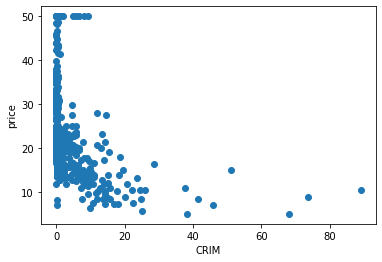

In [3]:
# 범죄율 : 가격
visualize('CRIM')

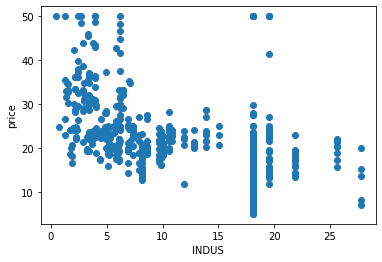

In [4]:
# 비소매상업지역 면적 비율 : 가격
visualize('INDUS')

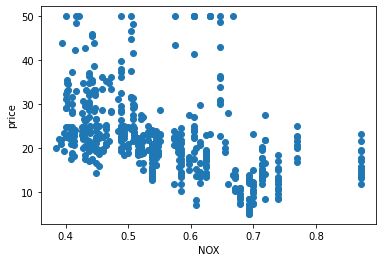

In [5]:
# 일산화질소 농도 : 가격
visualize('NOX')

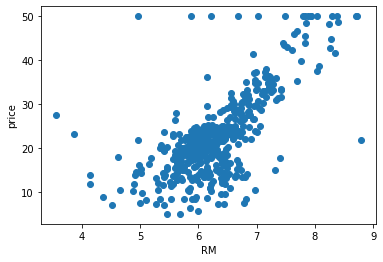

In [6]:
# 주택당 방의 수 : 가격
visualize('RM')

방의 개수와 가격은 상당히 높은 양의 상관관계를 가짐

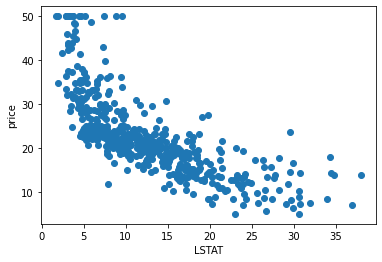

In [7]:
# 인구중 하위계층 비율 : 가격
visualize('LSTAT')

하위계층 비율과 가격은 상당히 높은 음의 상관관계를 가짐

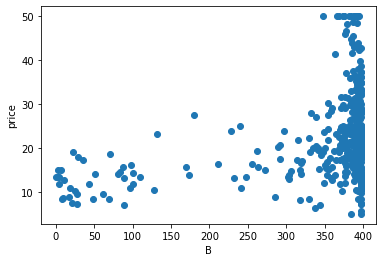

In [8]:
# 인구중 흑인 비율 : 가격
visualize('B')

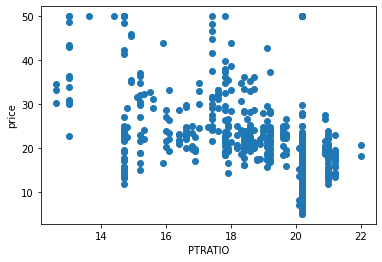

In [9]:
# 학생/교사비율 : 가격
visualize('PTRATIO')

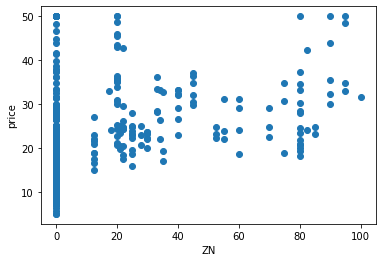

In [10]:
# 25,000 평방피트를 초과 거주지역 비율 : 가격
visualize('ZN')

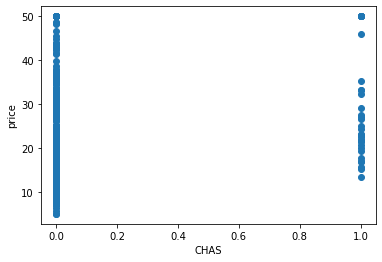

In [11]:
# 찰스강의 경계에 위치한 경우는 1, 아니면 0 : 가격
visualize('CHAS')

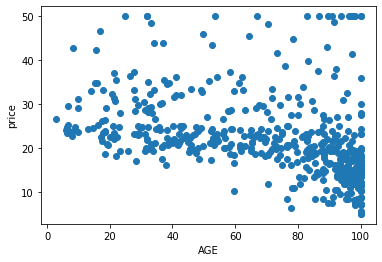

In [12]:
# 1940년 이전에 건축된 주택의 비율: 가격
visualize('AGE')

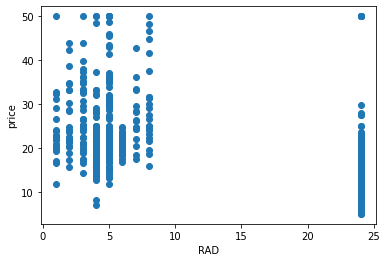

In [13]:
# 방사형 고속도로까지의 거리: 가격
visualize('RAD')

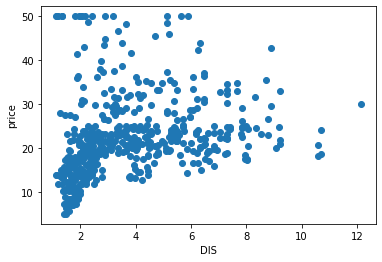

In [14]:
# 직업센터의 거리 : 가격
visualize('DIS')

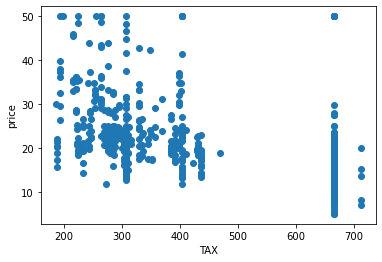

In [15]:
# 재산세율 : 가격
visualize('TAX')

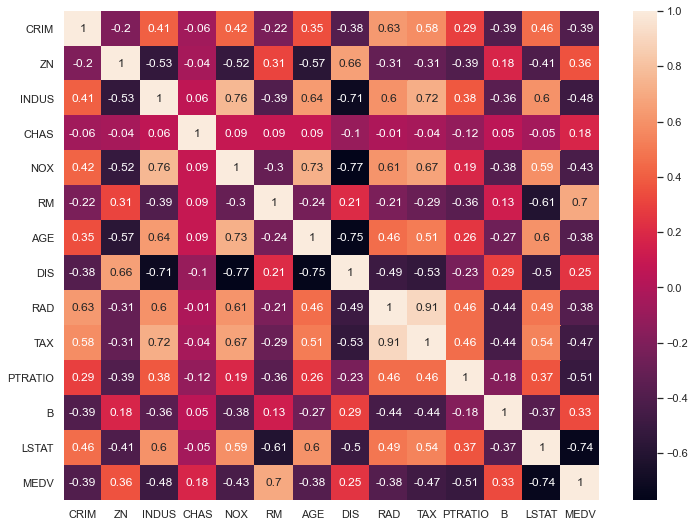

In [16]:
import seaborn as sns 

correlation_matrix = dataset.corr().round(2)

sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(data=correlation_matrix, annot=True) # 상관계수 분석
plt.show()
plt.close()

- 집의 가격과 제일 비례하는 것 : RM (방의 개수), 70%
- 집의 가격과 제일 반비례하는 것 : LSTAT(하위계층 비율), -74%
- RAD와 TAX의 상관관계가 무려 91%나 됨.
- DIS는 다른 데이터들과 상관관계가 높은편임.
<br><br>

회귀분석 결론 : 집의 가격은 방의 개수와 하위계층 비율과 큰 상관관계가 있고, 나머지 데이터와는 유의미한 관계 포착이 어렵습니다. 또한, RAD(고속도로와 거리)와 TAX(재산세율)의 경우 다중공선성이 우려되므로, 이 두 데이터는 반드시 빼고 회귀를 진행해야하며, DIS의 경우 다른 데이터들과 상관관계가 높으니 DIS(작업센터 거리)도 반드시 빼고 진행해야합니다.
<br><br>

#### 4.4. 모델링
모델링은 유명 머신러닝 프레임워크인 sklearn을 사용합니다. sklearn의 경우는 사용법이 너무 단순하고 쉽기 때문에, 따로 강의로 빼지 않고 각 강의를 진행하면서 차차 소개하려고합니다.

In [17]:
# 랜덤으로 섞기
dataset = dataset.sample(frac=1, random_state=5)

# 요거 두개만 쓰자!
rm = dataset['RM']
lstat = dataset['LSTAT']

# 라벨은 집의 가격
label = dataset['MEDV']

In [18]:
import numpy as np

"""
np.concatenate을 위해서는 차원을 늘리는게 좋습니다. 
물론 바로 붙여주는 np._c같은 함수도 있긴 하지만 제 강의 중에는
여러분의 암기량을 최소로 하기 위해 concatenate만 소개했기 때문에 
여기에서도 강의중에 설명했던 np.concatenate으로 구현합니다.
"""

# 차원 늘리기 (n) → (n, 1)
# 새로운 축을 만들고, 이 둘을 다른 열로 붙여야합니다.
rm = np.expand_dims(rm, axis=1) 
lstat = np.expand_dims(lstat, axis=1)

# 접합하기 (n, 1) ◎ (n, 1) = (n, 2), 
# ◎ = concatenate입니다.
regression_dataset = np.concatenate([rm, lstat], axis=1) 
regression_dataset

array([[ 8.04 ,  3.13 ],
       [ 6.63 ,  4.7  ],
       [ 6.417,  8.81 ],
       ...,
       [ 5.67 , 17.6  ],
       [ 6.326, 10.97 ],
       [ 5.936,  5.57 ]])

In [19]:
split = int(0.8 * len(dataset))

train_feature = regression_dataset[:split, :]
train_label = label[:split]

test_feature = regression_dataset[split:, :]
test_label = label[split:]

print(train_feature.shape, train_label.shape)
print(test_feature.shape, test_label.shape)

(404, 2) (404,)
(102, 2) (102,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# sklearn 모델 생성하기
model = LinearRegression()

# sklearn 모델 학습하기 : fit 함수
model.fit(train_feature, train_label) 

# sklearn 모델 테스트하기 : predict 함수
train_pred = model.predict(train_feature)
test_pred = model.predict(test_feature)

train_r2_score = r2_score(train_pred, train_label)
test_r2_score = r2_score(test_pred, test_label)
# 회귀모델은 R스퀘어로 평가합니다.

print('train r2 score : {}'.format(train_r2_score))
print('test r2 score : {}'.format(test_r2_score))

train r2 score : 0.43731091697011626
test r2 score : 0.5021738455623473


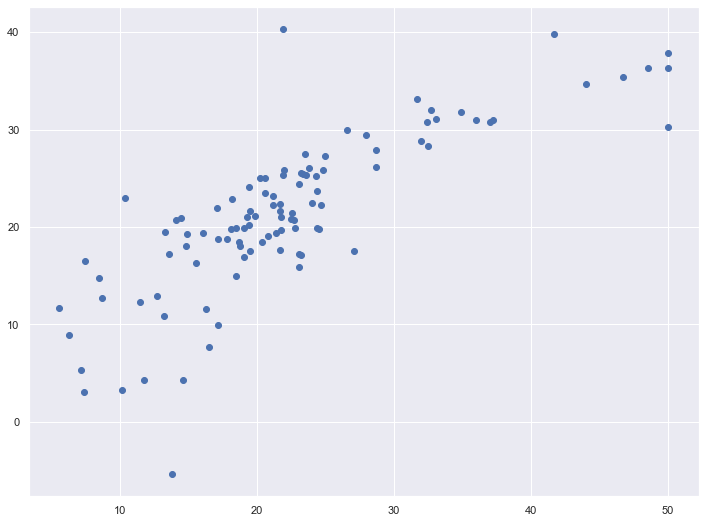

In [22]:
plt.scatter(test_label, test_pred)
plt.show()
plt.close()

두개의 컬럼만 사용해서 선형 회귀분석에 성공하였습니다. 이제 모델을 저장하고 예측해보겠습니다.

In [23]:
# sklearn 모델 저장
import joblib

joblib.dump(model, './models/linear_regression.pkl')

['./models/linear_regression.pkl']

In [24]:
# sklearn 모델 불러오기

model = joblib.load('./models/linear_regression.pkl')

In [25]:
for i, data in enumerate(zip(train_feature, label)):
    print(data)
    
    if i > 20:
        break

(array([8.04, 3.13]), 37.6)
(array([6.63, 4.7 ]), 27.9)
(array([6.417, 8.81 ]), 22.6)
(array([ 4.906, 34.77 ]), 13.8)
(array([7.691, 6.58 ]), 35.2)
(array([ 5.304, 26.64 ]), 10.4)
(array([6.976, 5.64 ]), 23.9)
(array([6.726, 8.05 ]), 29.0)
(array([ 6.715, 10.16 ]), 22.8)
(array([ 6.437, 14.36 ]), 23.2)
(array([7.416, 6.19 ]), 33.2)
(array([5.985, 9.74 ]), 19.0)
(array([5.972, 9.97 ]), 20.3)
(array([7.236, 6.93 ]), 36.1)
(array([6.538, 7.73 ]), 24.4)
(array([ 5.898, 12.67 ]), 17.2)
(array([ 4.628, 34.37 ]), 17.9)
(array([ 5.404, 13.28 ]), 19.6)
(array([ 5.39, 21.14]), 19.7)
(array([ 5.757, 10.11 ]), 15.0)
(array([ 5.093, 29.68 ]), 8.1)
(array([ 6.372, 11.12 ]), 23.0)


In [27]:
# sklearn 모델 예측하기 
# (위의 실제 정답셋과 비교해보세요)

eval_data = np.array([6.372, 11.12])
eval_data = eval_data.reshape(1, -1)
model.predict(eval_data)
# 실제 정담 : 23.0 | 예측 : 23.8

array([23.80598989])

<br>

### 5. 선형 회귀의 장점
- 선형 회귀의 원리 즉, 알고리즘을 쉽게 이해할 수 있습니다.
- 선형 회귀 알고리즘은 로지스틱 회귀, 딥러닝의 베이스입니다. 선형회귀를 공부하면 딥러닝의 핵심인 Gradient Descent 알고리즘을 이해할 수 있습니다.
- 선형적인 데이터 셋이 있으면 큰 효과를 볼 수 있습니다.
<br><br>

### 6. 선형 회귀의 단점
- 비정상적인 데이터 샘플이 존재할 시 직선 형성에 큰 영향을 받습니다.
- 비선형적인 관계를 가진 변수는 그 관계를 모델링 할 수 없습니다.
- 다중공선성과 같은 문제를 자체적으로 해결하지 못합니다. 